In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv('/Users/srinaren/Downloads/YouTube Ad Revenue Dataset.csv')
df.head()


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [3]:
df.shape

(122400, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [5]:
df.duplicated().sum()

np.int64(2400)

In [6]:
df.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [7]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


In [8]:
df = df.drop_duplicates()


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
cols = ["likes", "comments", "watch_time_minutes"]

for col in cols:
    median_rate = (df[col] / df["views"]).median()
    
    df.loc[df[col].isnull(), col] = df["views"] * median_rate


In [11]:
df["likes"] = df["likes"].round().astype(int)
df["comments"] = df["comments"].round().astype(int)

In [12]:
df.isnull().sum()

video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
dtype: int64

In [13]:
df["ad_revenue_usd"].describe()

count    120000.000000
mean        252.711361
std          61.954125
min         126.590603
25%         199.892158
50%         252.678607
75%         305.613497
max         382.768254
Name: ad_revenue_usd, dtype: float64

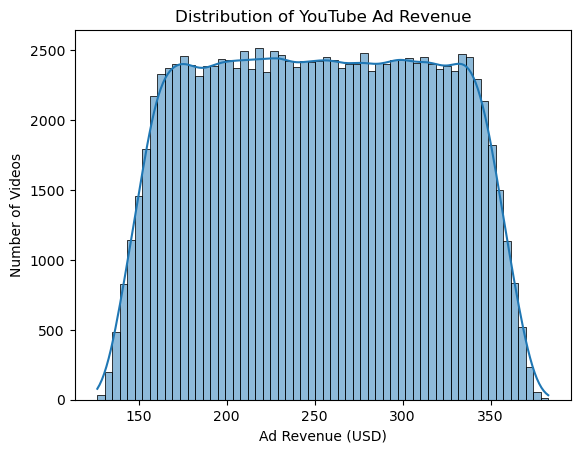

In [14]:
sns.histplot(df["ad_revenue_usd"],kde=True)
plt.title("Distribution of YouTube Ad Revenue")
plt.xlabel("Ad Revenue (USD)")
plt.ylabel("Number of Videos")
plt.show()


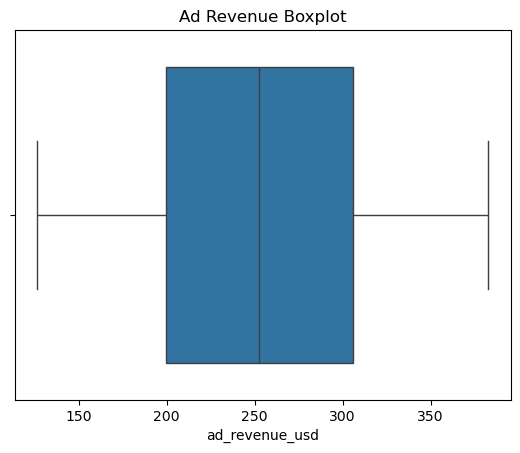

In [15]:
sns.boxplot(x=df['ad_revenue_usd'])
plt.title("Ad Revenue Boxplot")
plt.show()


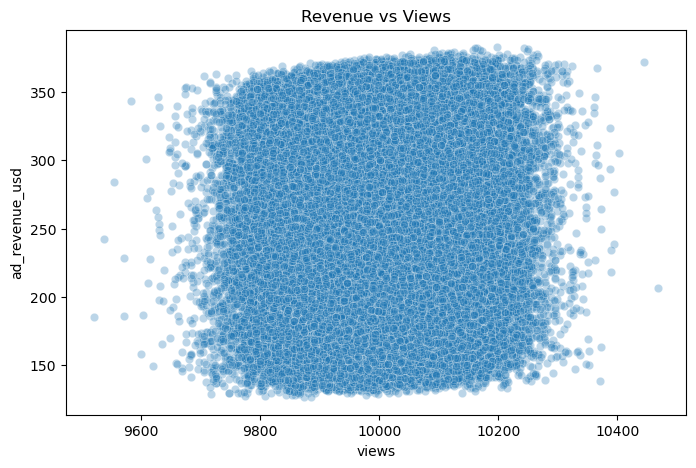

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="views", y="ad_revenue_usd", data=df, alpha=0.3)
plt.title("Revenue vs Views")
plt.show()


In [17]:
df["engagement_rate"] = (df["likes"] + df["comments"]) / df["views"]


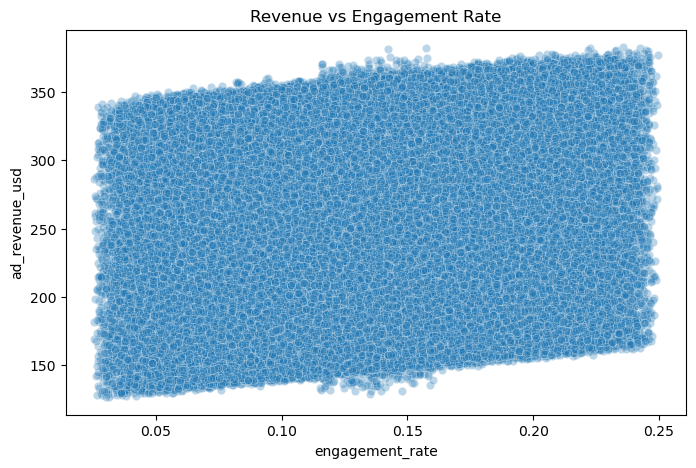

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="engagement_rate", y="ad_revenue_usd", data=df, alpha=0.3)
plt.title("Revenue vs Engagement Rate")
plt.show()


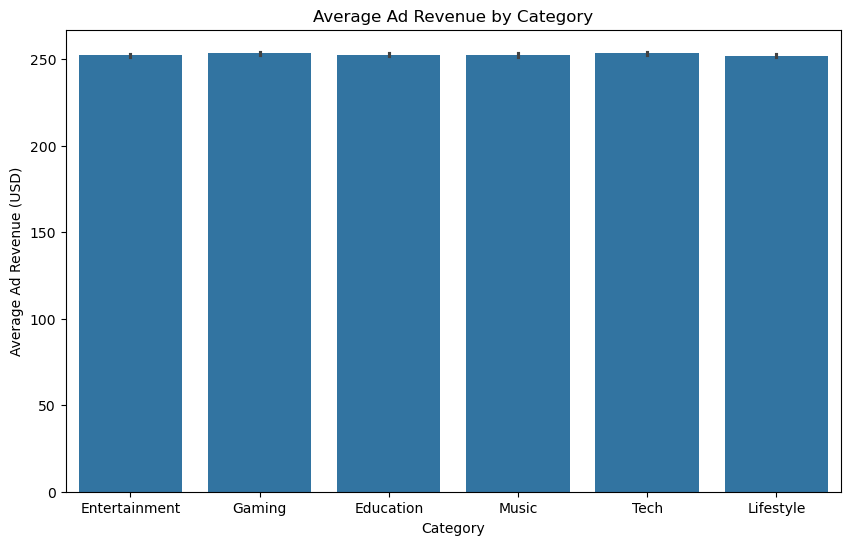

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x="category", y="ad_revenue_usd", data=df, estimator=np.mean)
plt.title("Average Ad Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Average Ad Revenue (USD)")
plt.show()


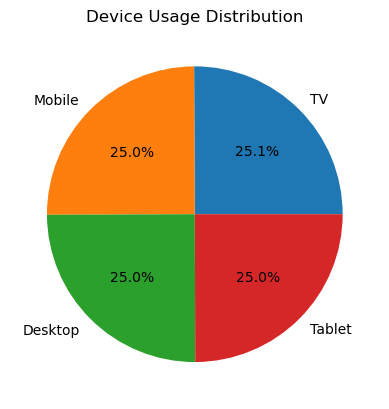

In [20]:
df["device"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Device Usage Distribution")
plt.ylabel("")
plt.show()


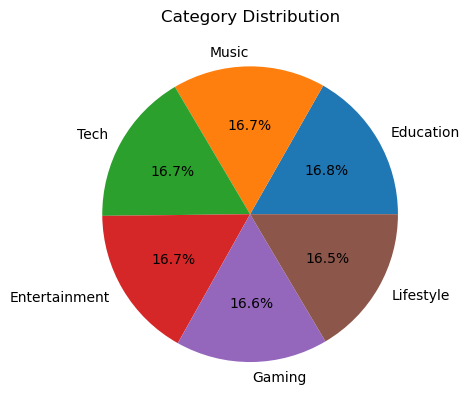

In [21]:
df["category"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Category Distribution")
plt.ylabel("")
plt.show()



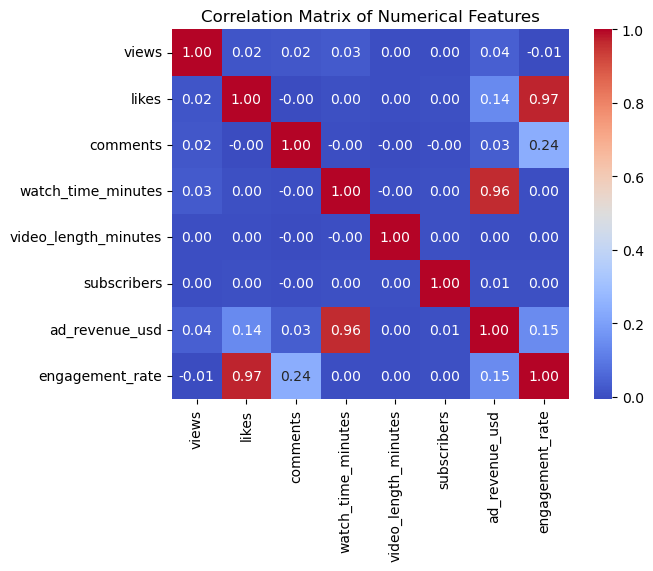

In [22]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix of Numerical Features")
plt.show()



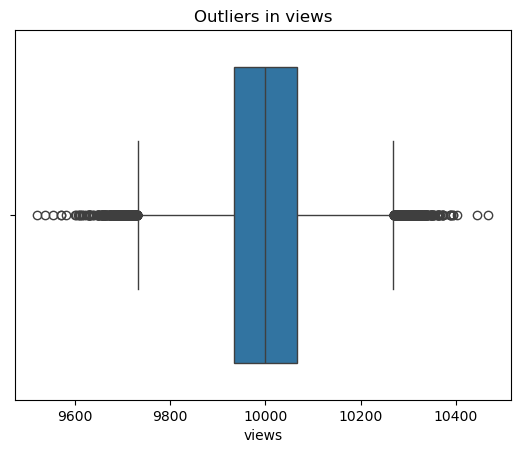

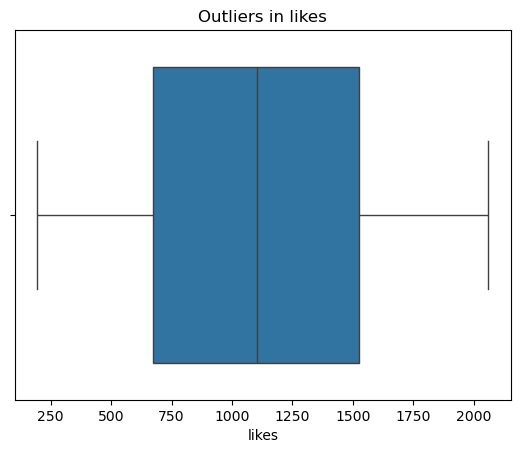

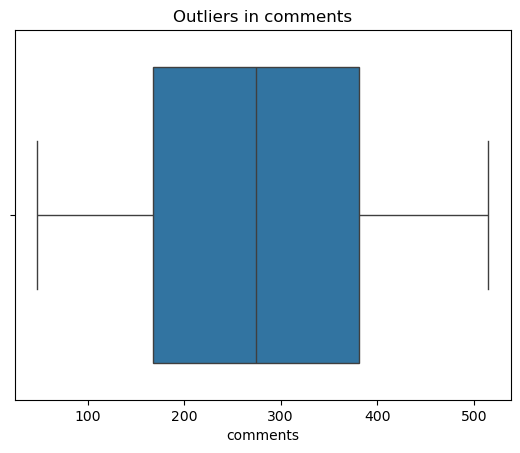

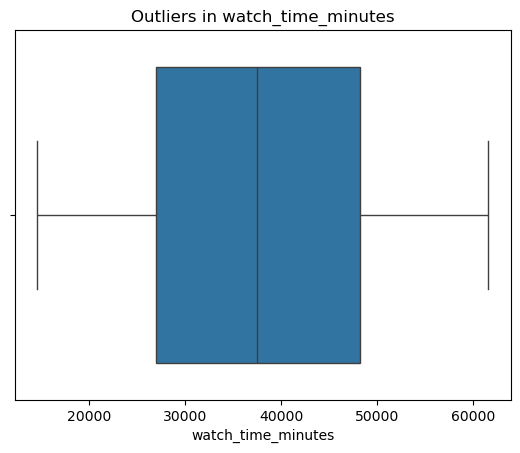

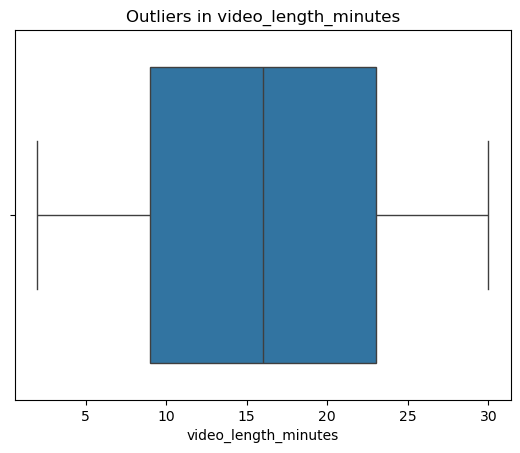

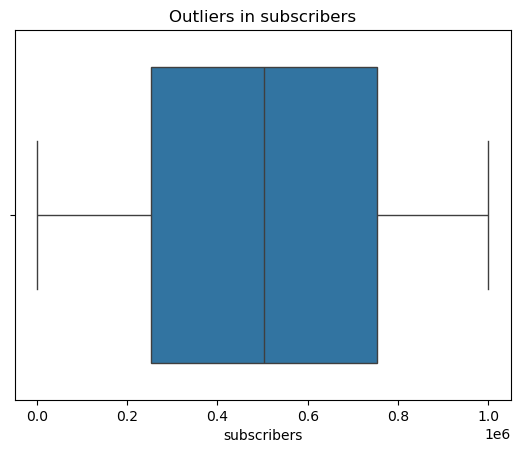

In [23]:
num_cols = ['views', 'likes', 'comments', 
            'watch_time_minutes', 
            'video_length_minutes', 
            'subscribers']

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


In [24]:
df["watch_time_per_view"] = df["watch_time_minutes"] / df["views"] 
df["retention_rate"] = df["watch_time_per_view"] / df["video_length_minutes"]


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              120000 non-null  object 
 1   date                  120000 non-null  object 
 2   views                 120000 non-null  int64  
 3   likes                 120000 non-null  int64  
 4   comments              120000 non-null  int64  
 5   watch_time_minutes    120000 non-null  float64
 6   video_length_minutes  120000 non-null  float64
 7   subscribers           120000 non-null  int64  
 8   category              120000 non-null  object 
 9   device                120000 non-null  object 
 10  country               120000 non-null  object 
 11  ad_revenue_usd        120000 non-null  float64
 12  engagement_rate       120000 non-null  float64
 13  watch_time_per_view   120000 non-null  float64
 14  retention_rate        120000 non-null  float64
dtypes: fl

In [26]:
df = df.drop(columns=["video_id", "date"])

In [27]:
df.head()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,watch_time_per_view,retention_rate
0,9936,1221,320,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,0.155093,2.666789,0.931748
1,10017,642,346,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,0.098632,1.518393,0.063964
2,10097,1979,187,57332.658498,26.200634,240534,Education,TV,CA,360.134008,0.214519,5.678187,0.216719
3,10034,1191,242,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,0.142814,3.122834,0.265314
4,9889,1858,477,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,0.236121,1.584151,0.238726


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   views                 120000 non-null  int64  
 1   likes                 120000 non-null  int64  
 2   comments              120000 non-null  int64  
 3   watch_time_minutes    120000 non-null  float64
 4   video_length_minutes  120000 non-null  float64
 5   subscribers           120000 non-null  int64  
 6   category              120000 non-null  object 
 7   device                120000 non-null  object 
 8   country               120000 non-null  object 
 9   ad_revenue_usd        120000 non-null  float64
 10  engagement_rate       120000 non-null  float64
 11  watch_time_per_view   120000 non-null  float64
 12  retention_rate        120000 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 16.8+ MB


In [29]:
# Seperating the target and feature variable
x = df.drop("ad_revenue_usd", axis=1)    
y = df["ad_revenue_usd"]

In [30]:
# Train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [31]:
categorical_cols = x_train.select_dtypes(include=['object']).columns
numerical_cols = x_train.select_dtypes(exclude=['object']).columns

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}


In [34]:
results = []

for name, model in models.items():
    
    # Create pipeline
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train
    pipe.fit(x_train, y_train)
    
    # Predictionsx
    y_train_pred = pipe.predict(x_train)
    y_test_pred = pipe.predict(x_test)
    
    # Train Metrics
    train_r2 = metrics.r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
    
    # Test Metrics
    test_r2 = metrics.r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
    
    results.append([
        name,
        train_r2, train_rmse, train_mae,
        test_r2, test_rmse, test_mae
    ])



In [35]:
results_df = pd.DataFrame(
    results,
    columns=[
        "Model",
        "Train R2", "Train RMSE", "Train MAE",
        "Test R2", "Test RMSE", "Test MAE" ]
)
results_sorted = results_df.sort_values(by="Test R2", ascending=False)
results_sorted

,Model,Train R2,Train RMSE,Train MAE,Test R2,Test RMSE,Test MAE
0,Linear Regression,0.950214,13.813681,3.198158,0.950726,13.792068,3.243074
1,Ridge,0.950213,13.813784,3.202060,0.950726,13.792102,3.247094
4,Gradient Boosting,0.950560,13.765591,3.712634,0.950437,13.832453,3.788294
2,Lasso,0.949534,13.907633,4.261995,0.950033,13.888724,4.308061
3,Random Forest,0.992674,5.298929,1.381323,0.946070,14.428914,3.751418


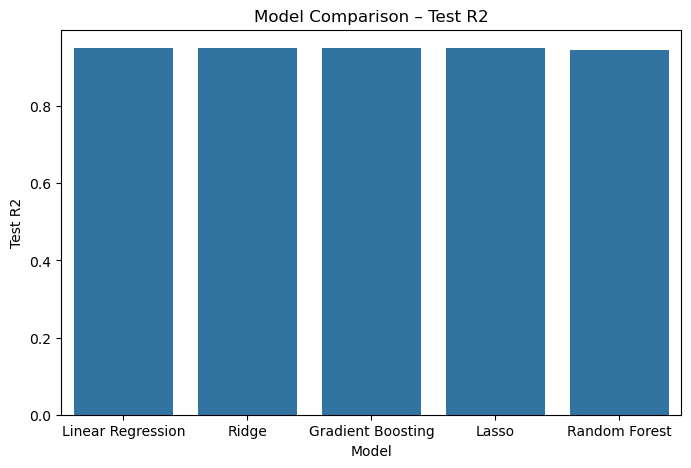

In [36]:
# R2
plt.figure(figsize=(8,5))
sns.barplot(data=results_sorted, x="Model", y="Test R2")
plt.title("Model Comparison – Test R2")
plt.ylabel("Test R2")

plt.show()


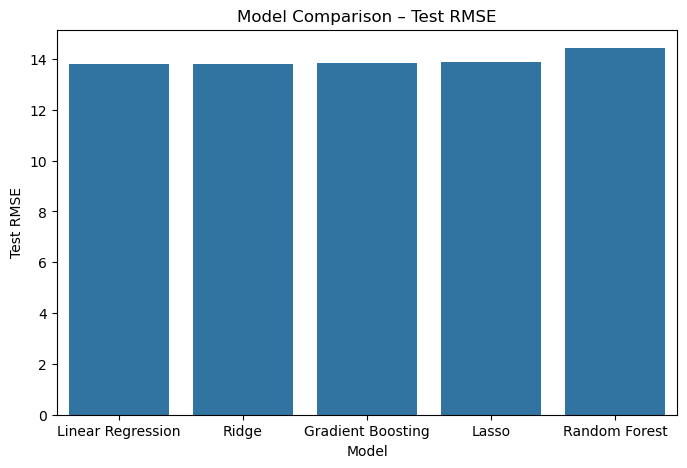

In [37]:
# RMSE
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.sort_values(by="Test RMSE"), x="Model", y="Test RMSE")
plt.title("Model Comparison – Test RMSE")
plt.ylabel("Test RMSE")

plt.show()


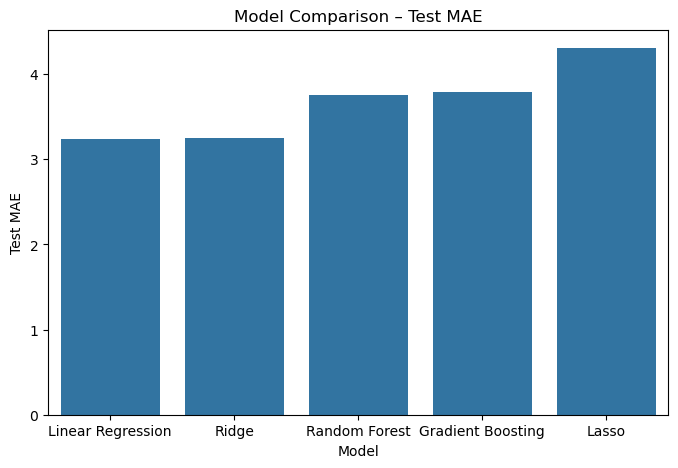

In [38]:
# MAE
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.sort_values(by="Test MAE"), x="Model", y="Test MAE")
plt.title("Model Comparison – Test MAE")
plt.ylabel("Test MAE")

plt.show()


In [39]:
best_model_name = results_sorted.iloc[0]["Model"]
best_model = models[best_model_name]

print("Best Model:", best_model_name)


Best Model: Linear Regression


In [40]:
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", best_model)
])

final_pipeline.fit(x_train, y_train)

import joblib
joblib.dump(final_pipeline, "best_model.pkl")


['best_model.pkl']

In [41]:
feature_names = final_pipeline.named_steps["preprocessor"].get_feature_names_out()
coefficients = final_pipeline.named_steps["model"].coef_

In [42]:
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})
coef_df.sort_values(by="Coefficient", ascending=False).head(10)


,Feature,Coefficient
3,num__watch_time_minutes,59.887582
1,num__likes,11.496829
2,num__comments,2.843708
0,num__views,0.434387
15,cat__device_Desktop,0.152974
4,num__video_length_minutes,0.076288
8,num__retention_rate,0.074946
12,cat__category_Lifestyle,0.074035
19,cat__country_AU,0.073419
21,cat__country_DE,0.048889


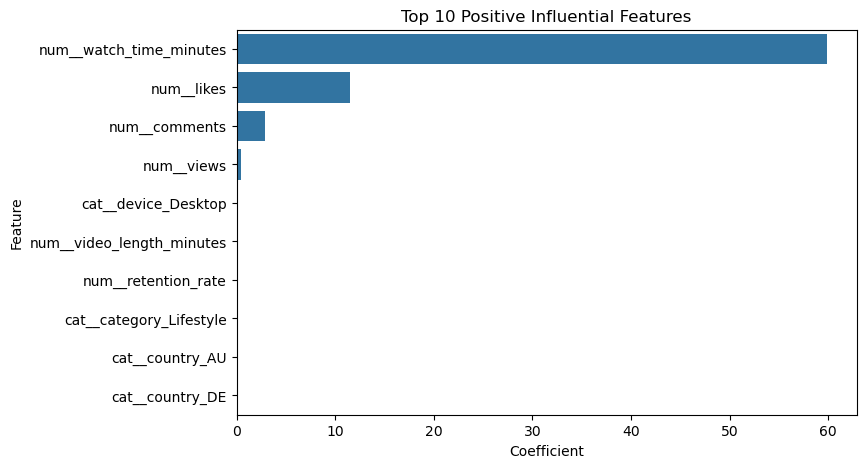

In [43]:
top_features = coef_df.sort_values(by="Coefficient",ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(data=top_features, x="Coefficient", y="Feature")
plt.title("Top 10 Positive Influential Features")
plt.show()

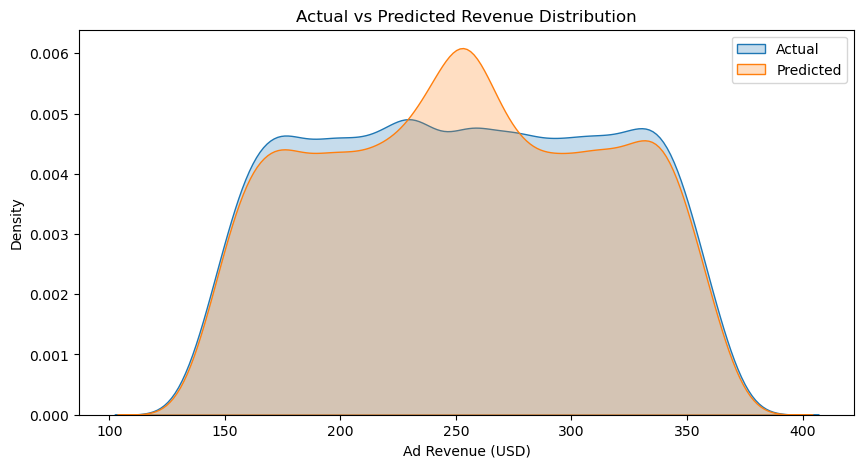

In [44]:
y_pred = final_pipeline.predict(x_test)
plt.figure(figsize=(10,5))

sns.kdeplot(y_test, label="Actual", fill=True)
sns.kdeplot(y_pred, label="Predicted", fill=True)

plt.title("Actual vs Predicted Revenue Distribution")
plt.xlabel("Ad Revenue (USD)")
plt.ylabel("Density")
plt.legend()
plt.show()


In [45]:
'''
The small bump around 250 appears because many videos in the dataset have similar mid-range watch time values,which strongly influence revenue. 
Since the model mainly depends on watch time, it predicts similar revenue for those videos. 
Linear regression also slightly smooths extreme values due to "regression-to-the-mean behavior", creating a small concentration 
around the center.
'''

'\nThe small bump around 250 appears because many videos in the dataset have similar mid-range watch time values,which strongly influence revenue. \nSince the model mainly depends on watch time, it predicts similar revenue for those videos. \nLinear regression also slightly smooths extreme values due to "regression-to-the-mean behavior", creating a small concentration \naround the center.\n'